# Some Exploratory Data Analysis Practice

## sklearn.neighbors

docs: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

examples: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#gallery-examples

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets, neighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Practice area

Now let's try and train a simple (or not so) kNN classifier on a more complicated dataset.

In [4]:
# If you are using colab, uncomment this cell

# !mkdir -p /content/sample_data/datasets
# !curl https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data > /content/sample_data/datasets/wine.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10782    0 10782    0     0   6777      0 --:--:--  0:00:01 --:--:--  6776


In [20]:
feature_names = ['class', 'Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity','Hue','0D280_0D315_of_diluted_wines','Proline']
dataset = pd.read_csv("/content/sample_data/datasets/wine.csv", header=None)
dataset.columns = feature_names
dataset.head()

,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [29]:

X = dataset.drop(0, axis=1).to_numpy()
y = dataset[0].to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(142, 13)
(36, 13)


**Small task: Those who gets accuracy of at least 0.8 recieves bonus (0.5 max)**

How much better can we do?

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import time

In [ ]:
%time
log_model = LogisticRegression()

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_model.fit(X_train, y_train)
predictions = log_model.predict(X_test)
accuracy_score(y_test, predictions)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


1.0

In [22]:
%time
X_train_poly = PolynomialFeatures(degree=2).fit_transform(X_train)
X_test_poly = PolynomialFeatures(degree=2).fit_transform(X_test)

log_model.fit(X_train_poly, y_train)
predictions = log_model.predict(X_test_poly)
accuracy_score(y_test, predictions)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


1.0

In [23]:
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malicacid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity_of_ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


It seems that for this dataset there are a lot of good features, with correlations of up to 0.85 ("Flavanoids"), that sum up and make it possible to create a really well performing model. 

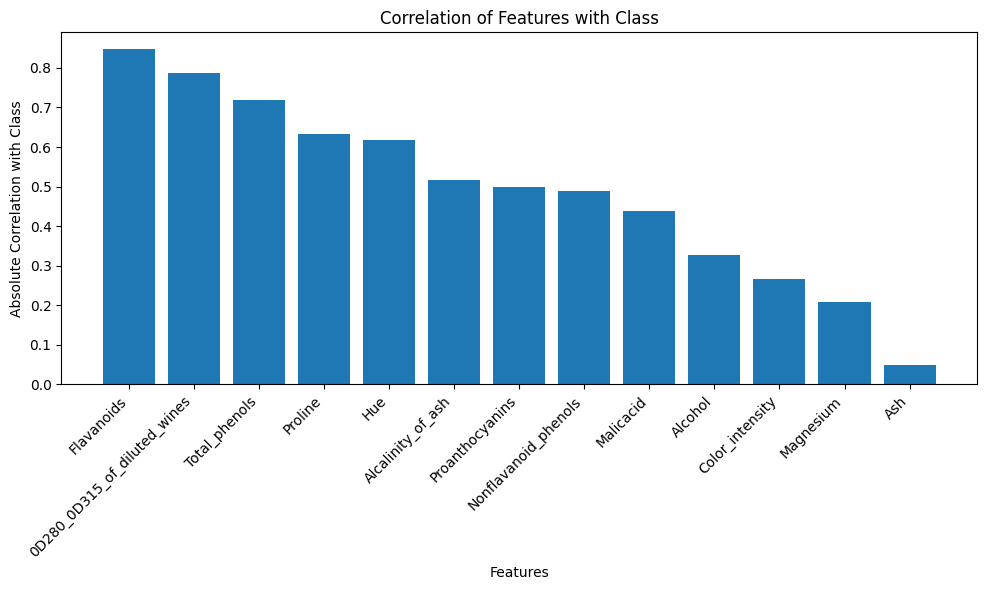

In [24]:
import matplotlib.pyplot as plt

class_correlations = corr.abs()['class'].drop('class')
class_correlations = class_correlations.sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(class_correlations.index, class_correlations.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Absolute Correlation with Class')
plt.title('Correlation of Features with Class')
plt.tight_layout()
plt.show()

Maybe it would be possible to create a model with accuracy of 0.8 with just this one feature?

In [27]:
X = dataset.iloc[:, 7].to_numpy().reshape(-1, 1)
y = dataset.iloc[:, 0].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_model.fit(X_train, y_train)
predictions = log_model.predict(X_test)
test_acc = accuracy_score(y_test, predictions)
print(f"test accuracy: {test_acc:.4f}")

test accuracy: 0.7778


Almost! But still it's very impressive that you could state the origin of the wine knowing only its Flavanoids number, with realistically good accuracy. Perhaps accuracy 0.8+ is possible with other models but it's out of scope of this task.

But can we *visually* determine the wine's origin, without doing any tests? Suppose we can determine Color intensity, Hue (which is color-related) and Alcohol which is usually stated on a bottle.

In [30]:
X = dataset.iloc[:, [1,10,11]].to_numpy()
y = dataset.iloc[:, 0].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_model.fit(X_train, y_train)
predictions = log_model.predict(X_test)
test_acc = accuracy_score(y_test, predictions)
print(f"test accuracy: {test_acc:.4f}")

test accuracy: 0.9444


**Yes**, we can, and we can be *very* sure!